In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# Read US vehicles sales advertisement into df
df = pd.read_csv('../vehicles_us.csv')

In [4]:
# Checking for columns containing missing values
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [5]:
# Pull the car make from the model column
def make_split(model):
    return model.split(' ')[0]

df['make'] = df['model'].apply(make_split)

In [6]:
df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  make          51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,make
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,chrysler
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,toyota
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,honda
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,kia
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,honda


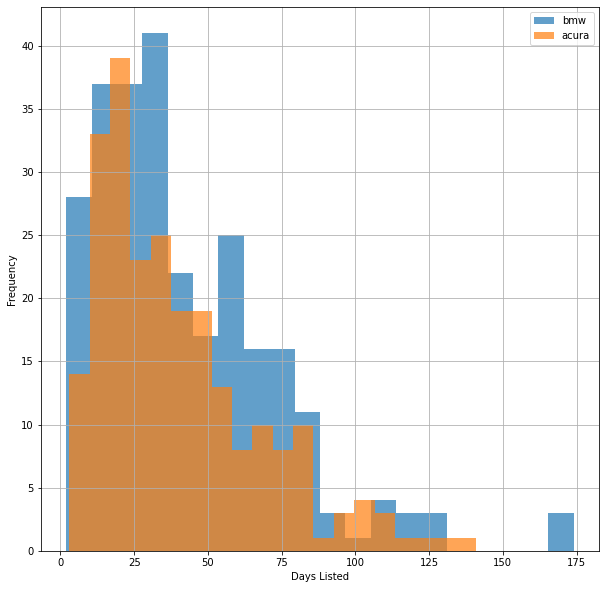

In [7]:
# histogram of car make and days listed

bmw = df.query("make == 'bmw'")
acura = df.query("make =='acura'")

bmw['days_listed'].hist(figsize=(10,10), alpha=0.7, bins=20)
acura['days_listed'].hist(alpha=0.7, bins=20)
plt.xlabel('Days Listed')
plt.ylabel('Frequency')
plt.legend(['bmw', 'acura'])
plt.show()

In [8]:
#df = px.data.tips()

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,make
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler


In [9]:
from locale import normalize


test = df.query("make == 'bmw' or make == 'acura'")

fig = px.histogram(test, x='type', color='make', opacity=.8)
fig.update_layout(xaxis_title_text='Days Listed')
fig.update_layout(title='YES')
fig.show()

In [10]:
df['price'].max()

375000

In [17]:
bmw = df.query("make == 'bmw' or make == 'ford'")

In [18]:
bmw.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,make
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
26,8499,2014.0,ford fusion se,like new,4.0,gas,79523.0,automatic,sedan,red,NaN,2018-10-25,23,ford
39,8000,2009.0,ford f-150,good,8.0,gas,234000.0,automatic,truck,black,1.0,2019-03-31,1,ford


In [29]:
px
fig2 = px.scatter(bmw, x='odometer', y='price', color='make', symbol='make', trendline=None)
fig2.show()